

***

<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>


# WEKEO atmosphere TRAINING

<div style="text-align: right"><i> INTERMEDIATE LEVEL </i></div>

***
<center><h1> The extreme drought of 2022 in Europe </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>


***

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. Setting up the R environment](#2.-Setting-up-the-R-environment)
- [3. Data Access](#3.-Data-Access)
- [4. Input](#4.-Input)
- [5. Plot](#5.-Plot)
    - [5.1. Basic Plot](#5.1.-Basic-Plot)
    - [5.2. Monthly anomaly maps of temperature](#5.2.-Monthly-anomaly-maps-of-temperature)
        - [5.2.1. Monthly mean](#5.2.1.-Monthly-mean)
        - [5.2.2. Anomaly maps](#5.2.2.-Anomaly-maps)
    - [5.3. Annual anomaly maps of precipitation](#5.3.-Annual-anomaly-maps-of-precipitation)
   - [5.4. The impact of drought in Porto](#5.4.-The-impact-of-drought-in-Porto)  
- [6. Conclusion](#6.-Conclusion)


# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)

This training focuses on the extreme drought of 2022 in Europe. The 2022 drought in Europe was one of the most severe ever recorded, affecting large parts of the continent with significant environmental, agricultural, and water resource consequences. A combination of exceptionally high temperatures, insufficient rainfall, and prolonged heatwaves led to soil drying and a drastic decline in river and lake levels. This situation severely impacted agriculture, reducing crop yields and threatening food security. Additionally, the drought intensified wildfires, particularly in Spain, France, and Portugal, releasing significant amounts of air pollutants. The drop in water levels also disrupted river transport and hydroelectric power production, highlighting Europe’s vulnerability to extreme climatic conditions.

This training will allow to see the evolution of different parameters (precipitation, air temperature,carbon monoxide) over time.


# 2. Setting up the R environment
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Here is the list of the modules we will be using in this exercise.

| Module name | Description |
| :---: | :---|
| **ggplot2** |[ggplot2](https://ggplot2.tidyverse.org/) is a system for declaratively creating graphics. |
| **dplyr** |[dplyr](https://dplyr.tidyverse.org/) is a library for manipulating data. |
| **RColorBrewer** |[RColorBrewer](https://cran.r-project.org/web/packages/RColorBrewer/index.html) is a library for color palettes in plot. |
| **ncdf4** |[ncdf4](https://cran.r-project.org/web/packages/ncdf4/index.html) is an interface for the 'NetCDF' file formats. |
| **gridExtra** |[gridExtra](https://cran.r-project.org/web/packages/gridExtra/index.html) is a library for arranging multiple grid-based plots on a page. |
| **lubridate** |[lubridate](https://www.rdocumentation.org/packages/lubridate/versions/1.9.3) is a library for fast and user-friendly analysis of date-time data. |


In [1]:
# Modules system
# for ignoring Warning message
options(warn = -1) 

## Load Packages
library(ggplot2)        # System to creating graphycs
library(dplyr)          # Operators for data manipulation
library(RColorBrewer)   # For color palettes
library(ncdf4)          # High-level interface to netCDF data files
library(gridExtra)      # To arrange multiple grid-based plots on a page
library(lubridate)      # Fast and user friendly parsing of date-time data



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




If the required R libraries are not installed, you can use the following command to install them:

<center><h4> install.packages(c( "ggplot2", "dplyr", "RColorBrewer", "ncdf4", "gridExtra", "lubridate")) </h4></center>

# 3. Data Access

[Go back to the "Table of contents"](#Table-of-contents)


From the [WEKEO data](https://www.wekeo.eu/data), you can explore all the products available with many filters to select the region you are interested in, the parameters you want to study, etc.

WEkEO is a European platform providing access to environmental data, developed by the European Union in partnership with agencies like ESA (European Space Agency), EUMETSAT, and Mercator Ocean. It provides access to a wide range of Earth observation data.

For this training, we will use the following data:

* **Full Name**: ERA5-Land monthly averaged data from 1950 to present
* **ProductID**: EO:ECMWF:DAT:REANALYSIS_ERA5_LAND_MONTHLY_MEANS
* **Spatial region**: From Lat=(36ºN, 52ºN), Lon=(-10ºE,15ºE)
* **Variables**: precipitation, air temperature at 2m
* **Time period**: monthly means from January 2000 to December 2024

 and: 
* **Full Name**: CAMS_GLOBAL_REANALYSIS_EAC4
* **Spatial region**: From Lat=(36ºN, 52ºN), Lon=(-10ºE,15ºE)
* **Variables**: mass fraction carbon monoxide 
* **Time period**: monthly means from January 2022 to December 2022

**You don't have to download it**, the files are already downloaded in this training.

__Optional:__ Go to the `Data store` and try to download this data selection. Note: You'll need to have your own WEKEO credentials -- username and password. Creating an account is free of charge and available [here](https://www.wekeo.eu/register).

# 4. Input
[Go back to the "Table of contents"](#Table-of-contents)


In [2]:
# Set the path for the NetCDF files
file <- "data/monthly_temperature.nc"


In [8]:
# Load NetCDF File
data <- nc_open(file)

# Print all information in the Netcdf File
print(data)

File data/monthly_temperature.nc (NC_FORMAT_NETCDF4):

     3 variables (excluding dimension variables):
        8 byte int number[]   (Contiguous storage)  
            long_name: ensemble member numerical id
            units: 1
            standard_name: realization
        string expver[valid_time]   (Contiguous storage)  
        float t2m[longitude,latitude,valid_time]   (Chunking: [151,101,210])  (Compression: shuffle,level 1)
[1] ">>>> WARNING <<<  attribute GRIB_paramId is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute GRIB_numberOfPoints is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute GRIB_stepUnits is an 8-byte value, but R"
[1] "does not support this data type

In [4]:
# Access Data
latitude <- ncvar_get(data, "latitude")  # Name of the latitude variable
longitude <- ncvar_get(data, "longitude")  # Name of the longitude variable
time <- ncvar_get(data, "valid_time")  # Name of the time variable

temperature <- ncvar_get(data, "t2m")       # air temperature at 2m



In [5]:
# visualisation of variable
print(dim(temperature)) # know the dimension of the variable
print (temperature[10,10,1]) # know the value depending on longitude, latitude and time

[1] 301 201 420
[1] 279.2473


We see that temperature is in Kelvin not in degrees, so we convert to °C:

In [6]:
# Temperature conversion in °C
temperature <-  ncvar_get(data, "t2m") -273.15
print (temperature[10,10,1])

[1] 6.097314


In [7]:
# visualisation of variable time
print(time[1]) # know the value of the first time

[1] 631152000


In [9]:
# Variable time is the number of seconds since 1970-01-01 00:00:00, we should convert:
time_values <- as.POSIXct(time, origin = "1970-01-01", tz = "GMT")
time_values

  [1] "1990-01-01 GMT" "1990-02-01 GMT" "1990-03-01 GMT" "1990-04-01 GMT"
  [5] "1990-05-01 GMT" "1990-06-01 GMT" "1990-07-01 GMT" "1990-08-01 GMT"
  [9] "1990-09-01 GMT" "1990-10-01 GMT" "1990-11-01 GMT" "1990-12-01 GMT"
 [13] "1991-01-01 GMT" "1991-02-01 GMT" "1991-03-01 GMT" "1991-04-01 GMT"
 [17] "1991-05-01 GMT" "1991-06-01 GMT" "1991-07-01 GMT" "1991-08-01 GMT"
 [21] "1991-09-01 GMT" "1991-10-01 GMT" "1991-11-01 GMT" "1991-12-01 GMT"
 [25] "1992-01-01 GMT" "1992-02-01 GMT" "1992-03-01 GMT" "1992-04-01 GMT"
 [29] "1992-05-01 GMT" "1992-06-01 GMT" "1992-07-01 GMT" "1992-08-01 GMT"
 [33] "1992-09-01 GMT" "1992-10-01 GMT" "1992-11-01 GMT" "1992-12-01 GMT"
 [37] "1993-01-01 GMT" "1993-02-01 GMT" "1993-03-01 GMT" "1993-04-01 GMT"
 [41] "1993-05-01 GMT" "1993-06-01 GMT" "1993-07-01 GMT" "1993-08-01 GMT"
 [45] "1993-09-01 GMT" "1993-10-01 GMT" "1993-11-01 GMT" "1993-12-01 GMT"
 [49] "1994-01-01 GMT" "1994-02-01 GMT" "1994-03-01 GMT" "1994-04-01 GMT"
 [53] "1994-05-01 GMT" "1994-06-01 GMT

In [10]:
# delete variable for memory
rm(data)

# 5. Plot

[Go back to the "Table of contents"](#Table-of-contents)
    
## 5.1. Basic Plot
[Go back to the "Table of contents"](#Table-of-contents)

In [11]:
# Determine figure size
options(repr.plot.width =16, repr.plot.height = 10) 

In [12]:
# we create a dataframe
index<-1
df <- data.frame(expand.grid(longitude, latitude), temperature = as.vector(temperature[,,index]))
names(df) <- c("Longitude", "Latitude", "temperature")

In [13]:
# visualisation of the dataframe
df[1:20,]

,Longitude,Latitude,temperature
,<dbl[1d]>,<dbl[1d]>,<dbl>
1,-10.0,55,NaN
2,-9.9,55,NaN
3,-9.8,55,NaN
4,-9.7,55,NaN
5,-9.6,55,NaN
6,-9.5,55,NaN
7,-9.4,55,NaN
8,-9.3,55,NaN
9,-9.2,55,NaN


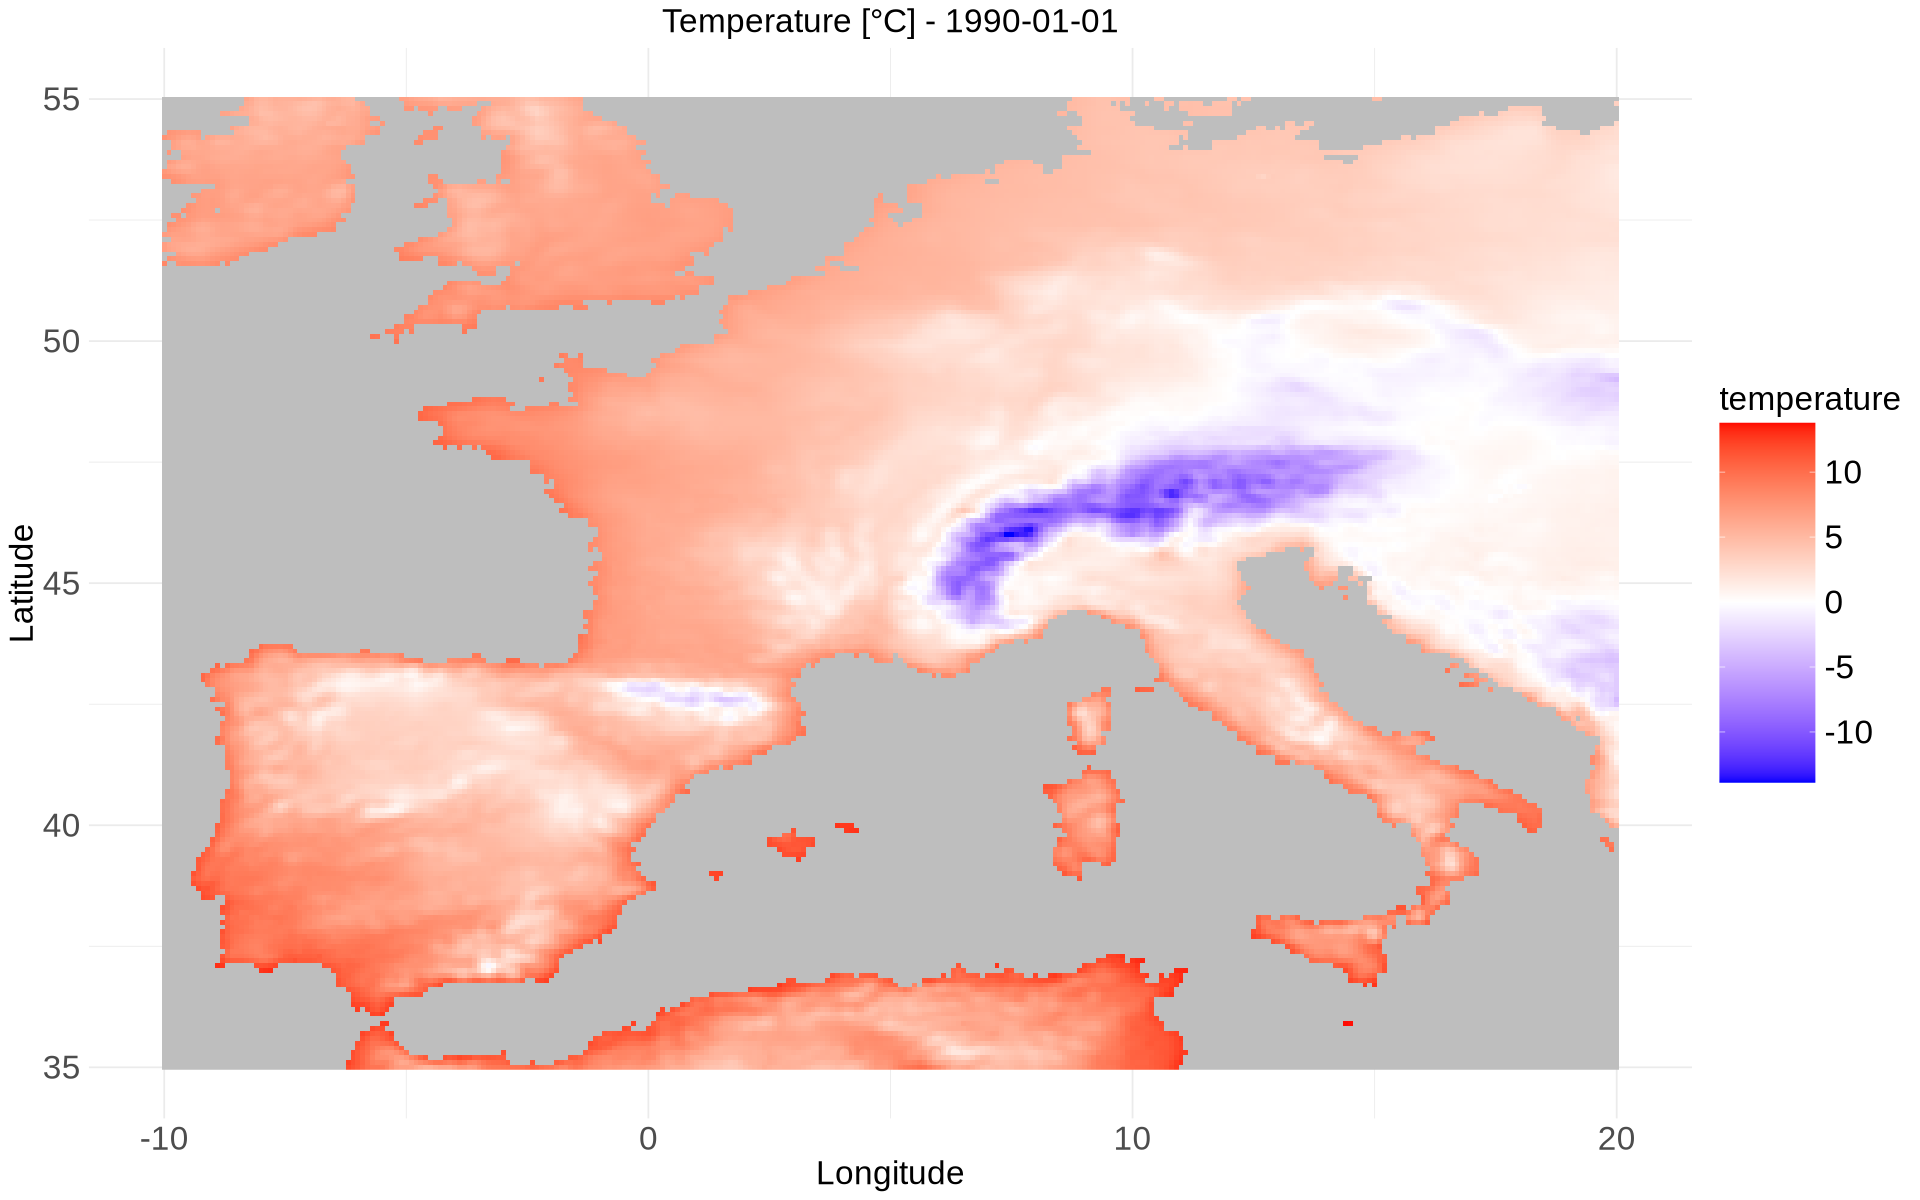

In [16]:
# Plotting
p <- ggplot() +

# Add temperature data 
geom_raster(data = df, aes(x=Longitude, y=Latitude, fill = temperature)) +

# Color scale options limits
scale_fill_gradient2(low = "blue", mid = "white", high = "Red", midpoint = 0,limits = c(), na.value = "grey") +

# General aesthetic options
theme_light() +

# Title and subtitle
labs(title = paste("Temperature [°C] - ",time_values[index],sep=''),
     x = "Longitude",
     y = "Latitude")+

# Legend position and aesthetic options
theme_minimal()+

theme(
    axis.text.x = element_text(size = 20),  # Increase the size of the x-axis values
    axis.text.y = element_text(size = 20),  # Increase the size of the y-axis values
    plot.title = element_text(hjust = 0.5, size = 20),  # Center and increase the size of the title
    axis.title.x = element_text(size = 20),  # Increase the size of the x-axis title
    axis.title.y = element_text(size = 20),  # Increase the size of the y-axis title
    legend.text = element_text(size = 20),    # Increase the size of the legend text
    legend.title = element_text(size = 20)     # Increase the size of the legend title
)   +
  guides(fill = guide_colorbar(barwidth = 4, barheight = 15)) + # Adjust the size of the colorbar
  coord_fixed()   # Maintain proportions
    
p
# to save the figure
ggsave("./figures/basic_figure.png", plot = p, width = 12, height = 12, dpi = 300)

# delete variable for memory
rm(p)

We see a cartographic representation of temperature in January 1990. The temperature is lower in the East of Europe and on the mountains.

## 5.2. Monthly anomaly maps of temperature
[Go back to the "Table of contents"](#Table-of-contents)

What is interesting, is the temperature during the summer months of 2022 compared to the seasonal normal. For this, in this part we will take a monthly average of all the years 1990-2024, to be able to display monthly temperature anomaly maps.

### 5.2.1. Monthly mean
[Go back to the "Table of contents"](#Table-of-contents)

In [17]:
# creating a dataframe of po4 variable 
df <- data.frame(expand.grid(longitude, latitude,time_values), temperature = as.vector(temperature))
names(df) <- c("Longitude", "Latitude","time", "temperature")

# add the corresponding month
df$month <- as.numeric(format(df$time, "%m"))

# dataframe visualization
df[1:10,]

,Longitude,Latitude,time,temperature,month
,<dbl[1d]>,<dbl[1d]>,<dttm[1d]>,<dbl>,<dbl>
1,-10.0,55,1990-01-01,NaN,1
2,-9.9,55,1990-01-01,NaN,1
3,-9.8,55,1990-01-01,NaN,1
4,-9.7,55,1990-01-01,NaN,1
5,-9.6,55,1990-01-01,NaN,1
6,-9.5,55,1990-01-01,NaN,1
7,-9.4,55,1990-01-01,NaN,1
8,-9.3,55,1990-01-01,NaN,1
9,-9.2,55,1990-01-01,NaN,1


The next cell calculates the monthly average:

In [18]:
# average over each month 
monthly_means <- df %>% 
    group_by(Longitude, Latitude, month) %>%
    summarise(mean_temperature = mean(temperature,na.rm=FALSE))

# and we convert the results in dataframe. Because after the operation the dataframe became an object of tibble type 
monthly_means<- as.data.frame(monthly_means)

`summarise()` has grouped output by 'Longitude', 'Latitude'. You can override
using the `.groups` argument.


### 5.2.2. Anomaly maps
[Go back to the "Table of contents"](#Table-of-contents)

First, we are looking for the time index corresponding to the nearest date chosen: July 2022

In [19]:
# find the index of the nearest date
index <- which.min(abs(difftime(time_values, ymd_hms("2022-07-01 00:00:00"), units = "secs")))
index

[1] 391

In [20]:
# we create a dataframe with the corresponding date
df_2022<-data.frame(expand.grid(longitude, latitude), temperature_2022 = as.vector(temperature[,,index]))
names(df_2022) <- c("Longitude", "Latitude", "temperature_2022")

Now, We have a dataframe with values of temperature on July 2022. We need another dataframe with July average value. 

From the monthly_means dataframe, we only keep the values for the month of July


In [21]:
# subset the dataframe
monthly_means_july=subset(monthly_means,month==7)


Then we calculate the difference between the July 2022 values and the July average

In [22]:
# Combination of the two dataframe
df_mutualise <- left_join(df_2022, monthly_means_july, by = c("Longitude", "Latitude"))

# calculate the anomaly
df_mutualise$anomaly=df_mutualise$temperature_2022-df_mutualise$mean_temperature
df_mutualise[10:20,]

,Longitude,Latitude,temperature_2022,month,mean_temperature,anomaly
,<dbl[1d]>,<dbl[1d]>,<dbl>,<dbl>,<dbl>,<dbl>
10,-9.1,55,NaN,7,NaN,NaN
11,-9.0,55,NaN,7,NaN,NaN
12,-8.9,55,NaN,7,NaN,NaN
13,-8.8,55,NaN,7,NaN,NaN
14,-8.7,55,NaN,7,NaN,NaN
15,-8.6,55,NaN,7,NaN,NaN
16,-8.5,55,NaN,7,NaN,NaN
17,-8.4,55,NaN,7,NaN,NaN
18,-8.3,55,14.13052,7,13.92546,0.2050572


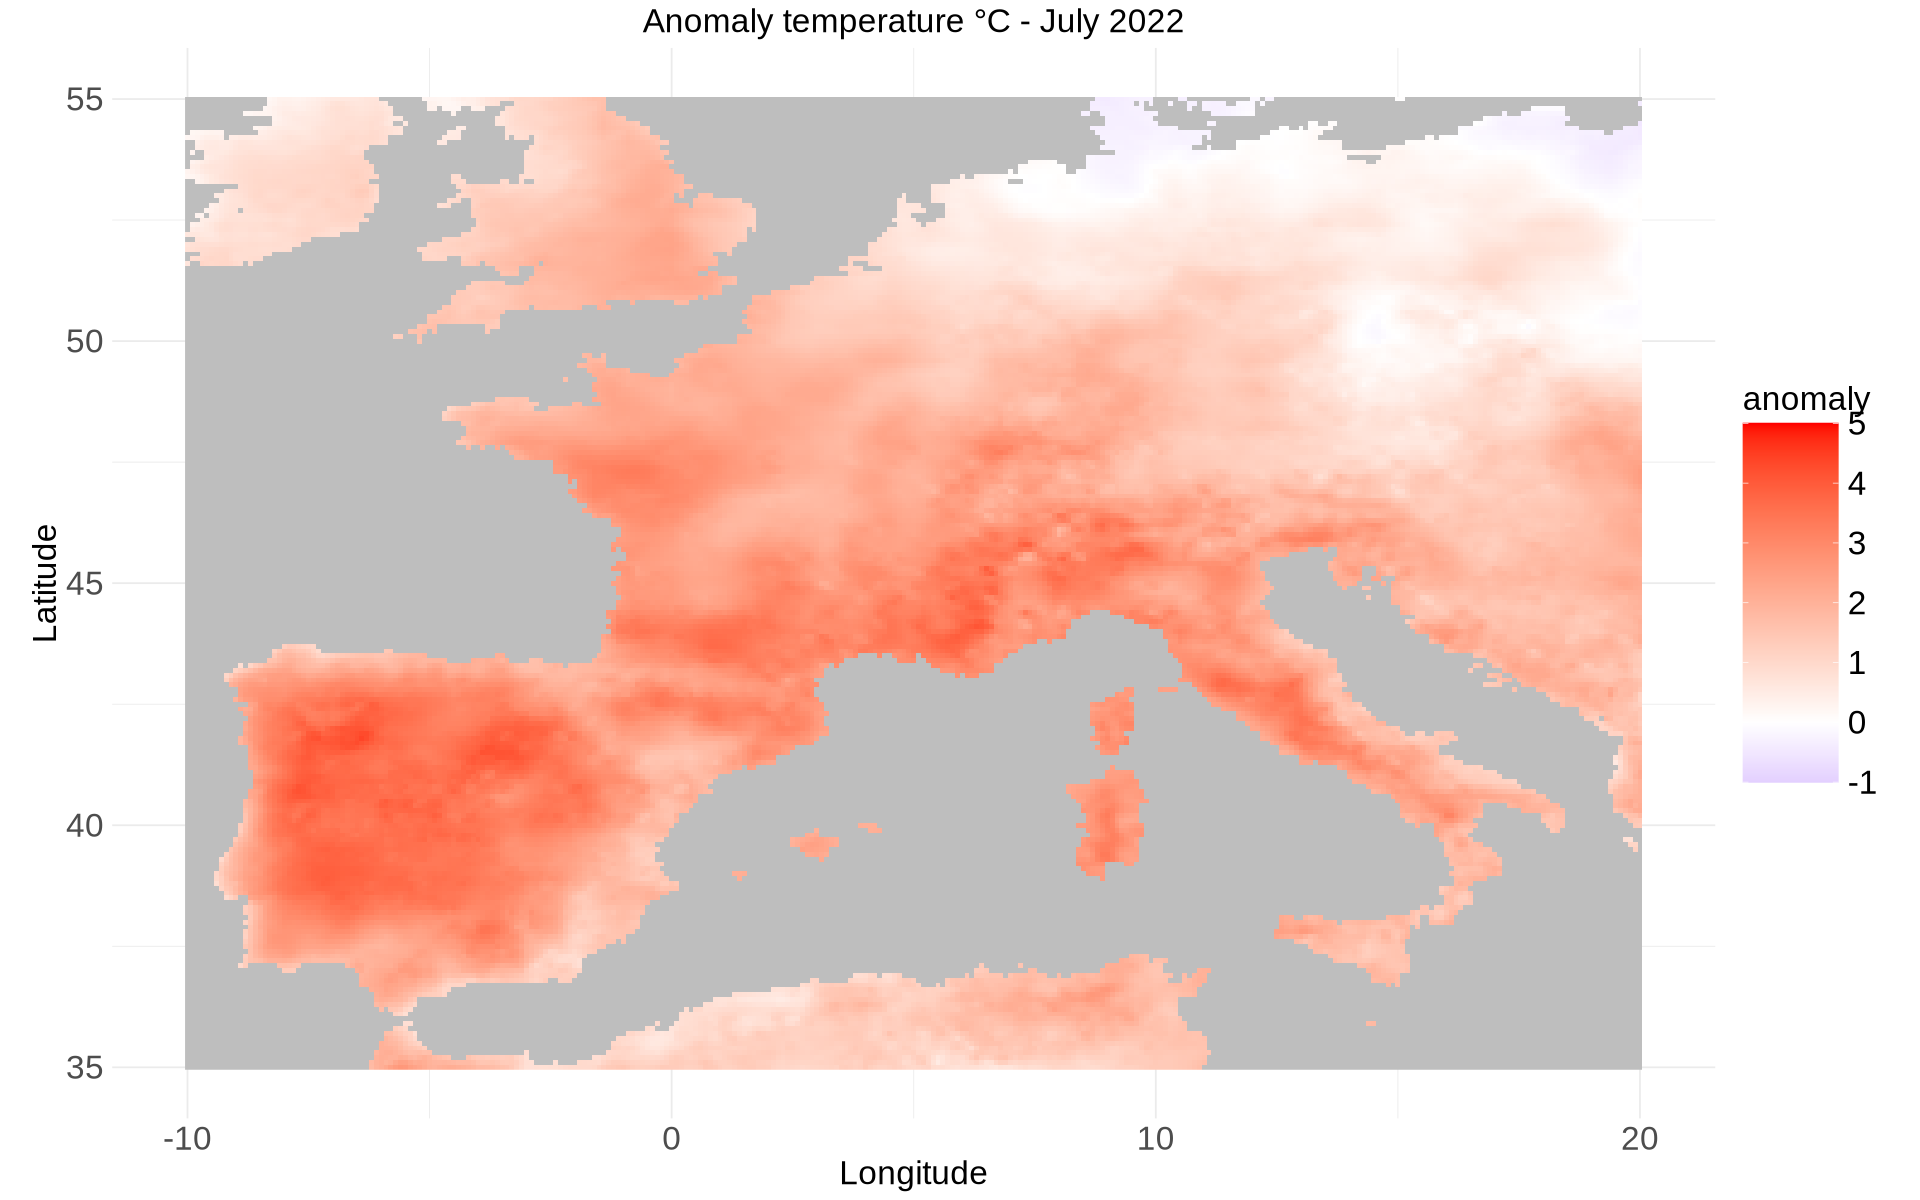

In [23]:
# Determine figure size
options(repr.plot.width =16, repr.plot.height = 10) 

# Plotting
p <- ggplot() +

# Add Phosphate data 
geom_raster(data = df_mutualise, aes(x=Longitude, y=Latitude, fill = anomaly)) +

# Color scale options limits
scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0,limits = c(-1,5), na.value = "grey") +
# General aesthetic options
theme_light() +

# Title and subtitle
labs(title = 'Anomaly temperature °C - July 2022',
     x = "Longitude",
     y = "Latitude")+

# Legend position and aesthetic options
theme_minimal()+

theme(
    axis.text.x = element_text(size = 20),  # Increase the size of the x-axis values
    axis.text.y = element_text(size = 20),  # Increase the size of the y-axis values
    plot.title = element_text(hjust = 0.5, size = 20),  # Center and increase the size of the title
    axis.title.x = element_text(size = 20),  # Increase the size of the x-axis title
    axis.title.y = element_text(size = 20),  # Increase the size of the y-axis title
    legend.text = element_text(size = 20),    # Increase the size of the legend text
    legend.title = element_text(size = 20)     # Increase the size of the legend title
)   +
  guides(fill = guide_colorbar(barwidth = 4, barheight = 15)) + # Adjust the size of the colorbar
  coord_fixed()   # Maintain proportions
    
p
# to save the figure
ggsave("./figures/Anomaly_July_temperature.png", plot = p, width = 12, height = 12, dpi = 300)

# delete variable
rm(p,df)

The temperature is well above normal in July 2022 in Europe. The southwestern part of Europe was the most impacted with temperatures more than 4°C higher than normal. 

We will now do some simple statistics on the temperature anomaly:

In [24]:
paste('The mean anomaly of temperature is: ',round(mean(df_mutualise$anomaly,na.rm=TRUE),2), '°C',sep='')
paste('The maximum anomaly of temperature is: ',round(max(df_mutualise$anomaly,na.rm=TRUE),2),'°C',sep='')
paste('The minimum anomaly of temperature is: ',round(min(df_mutualise$anomaly,na.rm=TRUE),2),'°C',sep='')


[1] "The mean anomaly of temperature is: 1.79°C"

[1] "The maximum anomaly of temperature is: 4.39°C"

[1] "The minimum anomaly of temperature is: -0.5°C"

<div class="alert alert-block alert-info">
<h3>Option:</h3>
You can test other month like August

## 5.3. Annual anomaly maps of precipitation
[Go back to the "Table of contents"](#Table-of-contents)

In this part we use the same method as seen previously but annually because winter precipitation has an impact on summer drought. First we load the data, then we calculate the annual average and then calculate the difference to have a precipitation anomaly map.

In [25]:
# Load precipitation variable
file <- "data/precipitation.nc"
data_precipitation <- nc_open(file)
 
# variables
precipitation <- ncvar_get(data_precipitation, "tp")*1000     # total precipitation to convert in mm
 
longitude_precipitation<-ncvar_get(data_precipitation, "longitude")
latitude_precipitation<-ncvar_get(data_precipitation, "latitude")
time_precipitation<-ncvar_get(data_precipitation, "valid_time")
time_precipitation <- as.POSIXct(time_precipitation, origin = "1970-01-01", tz = "GMT")

# delete variable for memory
rm(data_precipitation)

In [26]:
# creating a dataframe of precipitation variable 
df <- data.frame(expand.grid(longitude_precipitation, latitude_precipitation,time_precipitation), precipitation = as.vector(precipitation))

names(df) <- c("Longitude", "Latitude","time", "precipitation")

# add the corresponding year
df$year <- as.numeric(format(df$time, "%Y"))

# dataframe visualization
df[1:10,]

,Longitude,Latitude,time,precipitation,year
,<dbl[1d]>,<dbl[1d]>,<dttm[1d]>,<dbl>,<dbl>
1,-10.0,52,2000-01-01,2.902735,2000
2,-9.9,52,2000-01-01,2.750091,2000
3,-9.8,52,2000-01-01,2.631086,2000
4,-9.7,52,2000-01-01,2.513598,2000
5,-9.6,52,2000-01-01,2.390626,2000
6,-9.5,52,2000-01-01,2.262007,2000
7,-9.4,52,2000-01-01,2.125356,2000
8,-9.3,52,2000-01-01,1.984968,2000
9,-9.2,52,2000-01-01,1.850534,2000


In [27]:
# mean between 2000 - 2024
annual_means <- df %>%
  group_by(Longitude, Latitude) %>%
  summarise(mean_precip = mean(precipitation, na.rm = FALSE))

# mean of 2022
df_2022=subset(df,year==2022)
annual_means_2022 <- df_2022 %>%
  group_by(Longitude, Latitude) %>%
  summarise(mean_precip_2022 = mean(precipitation, na.rm = FALSE))

`summarise()` has grouped output by 'Longitude'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Longitude'. You can override using the
`.groups` argument.


In [29]:
# Combination of the two dataframe
df_mutualise <- left_join(annual_means_2022, annual_means, by = c("Longitude", "Latitude"))

# calculate the anomaly
df_mutualise$anomaly=(df_mutualise$mean_precip_2022-df_mutualise$mean_precip)/df_mutualise$mean_precip*100
df_mutualise[10:20,]

Longitude,Latitude,mean_precip_2022,mean_precip,anomaly
<dbl[1d]>,<dbl[1d]>,<dbl>,<dbl>,<dbl>
-10,36.9,NaN,NaN,NaN
-10,37.0,NaN,NaN,NaN
-10,37.1,NaN,NaN,NaN
-10,37.2,NaN,NaN,NaN
-10,37.3,NaN,NaN,NaN
-10,37.4,NaN,NaN,NaN
-10,37.5,NaN,NaN,NaN
-10,37.6,NaN,NaN,NaN
-10,37.7,NaN,NaN,NaN


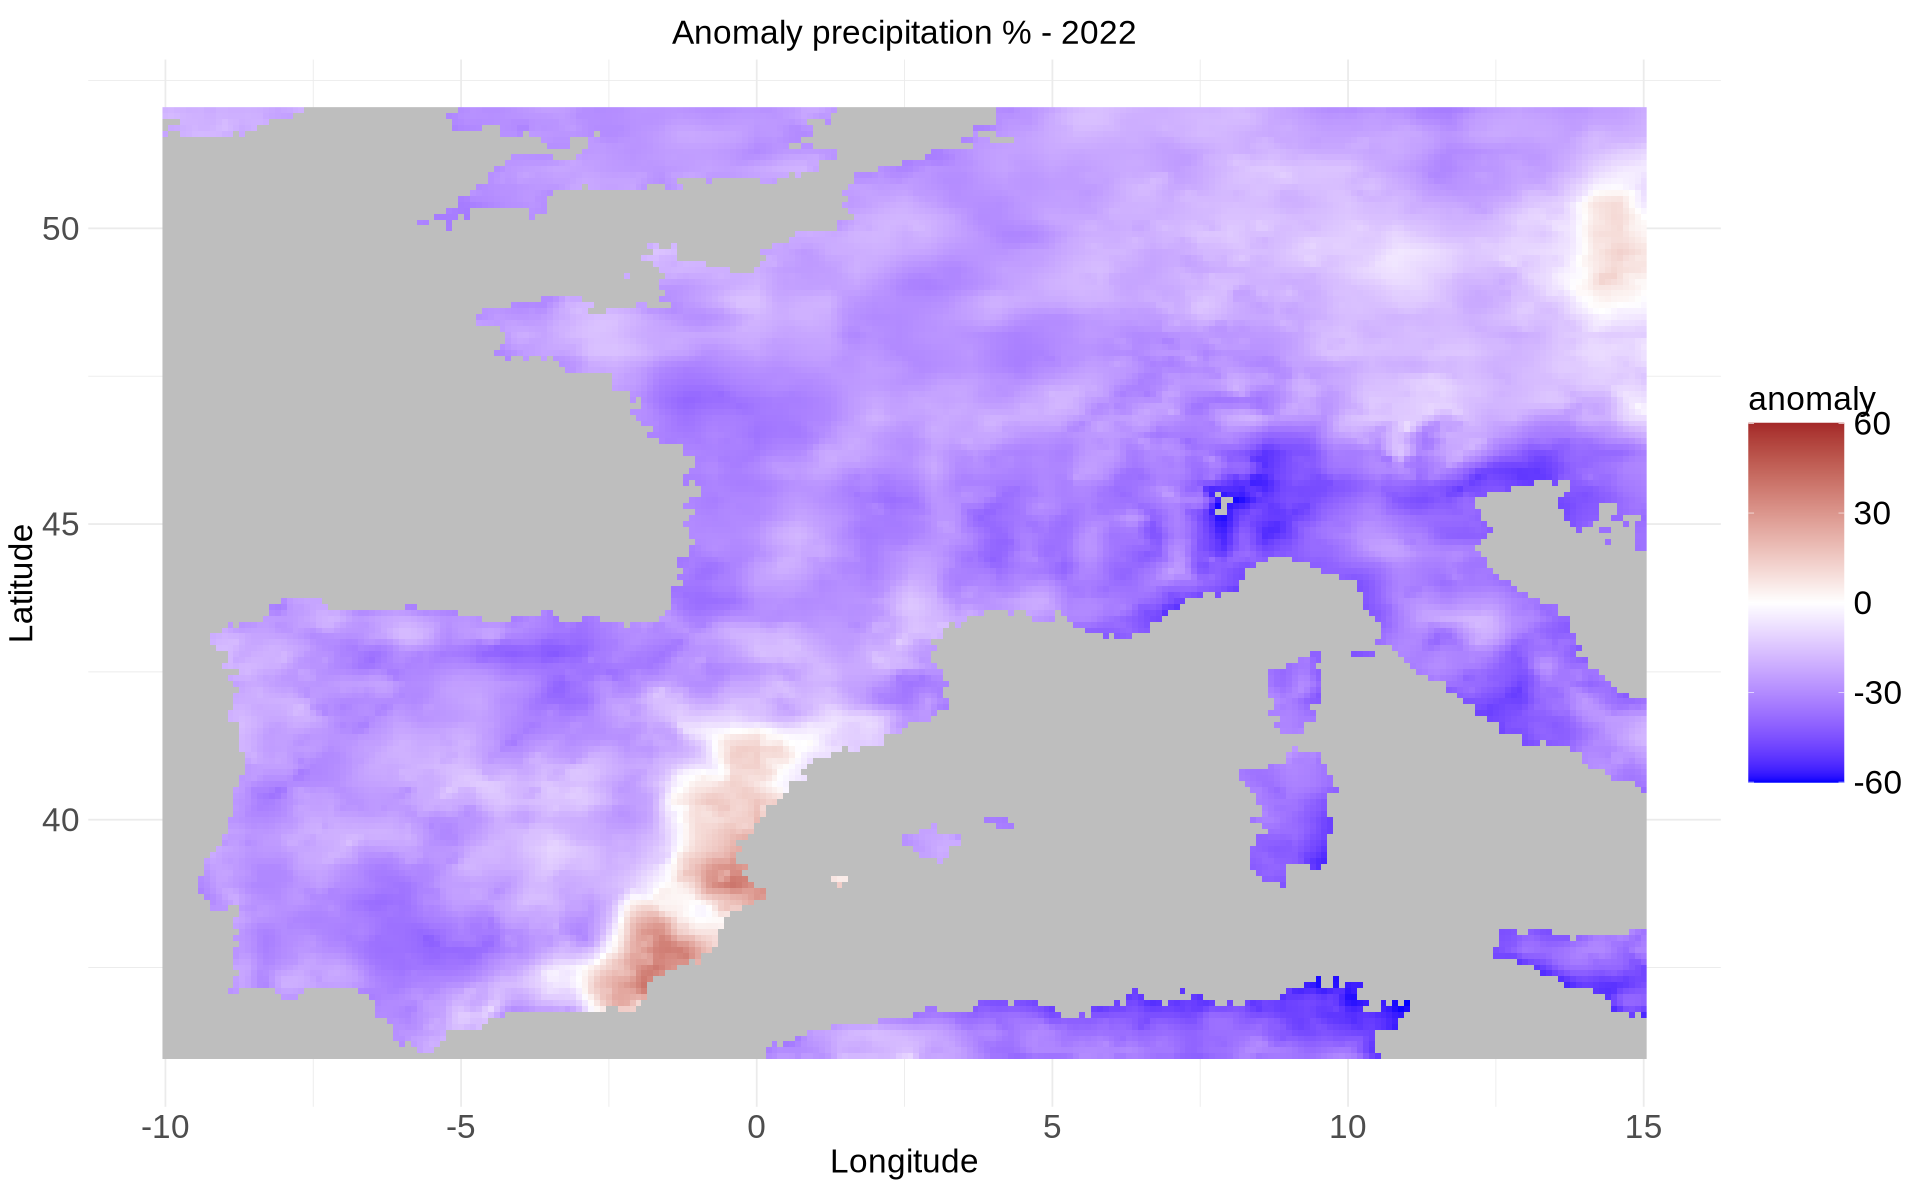

In [30]:
# Determine figure size
options(repr.plot.width =16, repr.plot.height = 10) 

# Plotting
p <- ggplot() +

# Add Phosphate data 
geom_raster(data = df_mutualise, aes(x=Longitude, y=Latitude, fill = anomaly)) +

# Color scale options limits
scale_fill_gradient2(low = "blue", mid = "white", high = "brown", midpoint = 0,limits = c(-60,60), na.value = "grey") +

# General aesthetic options
theme_light() +

# Title and subtitle
labs(title = 'Anomaly precipitation % - 2022',
     x = "Longitude",
     y = "Latitude")+

# Legend position and aesthetic options
theme_minimal()+

theme(
    axis.text.x = element_text(size = 20),  # Increase the size of the x-axis values
    axis.text.y = element_text(size = 20),  # Increase the size of the y-axis values
    plot.title = element_text(hjust = 0.5, size = 20),  # Center and increase the size of the title
    axis.title.x = element_text(size = 20),  # Increase the size of the x-axis title
    axis.title.y = element_text(size = 20),  # Increase the size of the y-axis title
    legend.text = element_text(size = 20),    # Increase the size of the legend text
    legend.title = element_text(size = 20)     # Increase the size of the legend title
)   +
  guides(fill = guide_colorbar(barwidth = 4, barheight = 15)) + # Adjust the size of the colorbar
  coord_fixed()   # Maintain proportions
    
p
# to save the figure
ggsave("./figures/Anomaly_precipitation_2022.png", plot = p, width = 12, height = 12, dpi = 300)

# delete variable
rm(p,df)

We see a lack of significant precipitation over part of Europe except eastern Spain. Lack of precipitation in 2022 in addition to temperatures above normal during the summer aggravated the drought.

## 5.4. The impact of drought in Porto
[Go back to the "Table of contents"](#Table-of-contents)

In this part we will focus on the impact of the drought in Portugal. In 2022, Portugal faced one of its worst droughts in decades, severely affecting the northern regions as seen before). The prolonged lack of rainfall and extreme temperatures created highly flammable conditions. The dry vegetation and strong winds fueled the spread of fires. The city of Porto, like many places in Europe, has been impacted by the smoke from these fires.

In this part we will at the evolution of the concentrations of carbon monoxide from March to October in 2022.

First we load files:

In [31]:
file <- "data/data_co.nc"
nc1 <- nc_open(file)

co <- ncvar_get(nc1, "co")
time <- ncvar_get(nc1, "valid_time")
longitude <- ncvar_get(nc1, "longitude")
latitude <- ncvar_get(nc1, "latitude")

time<- as.POSIXct(time, origin = "1970-01-01", tz = "GMT")

The coordinate that we want to study is as follow: 
- latitude: 41.18
- longitude: -8.59

We use the the line below to define the index of longitude and latitude that we should use.

In [32]:
# find index of the neareast coordinates
index_longitude <- which.min(abs(longitude-(-8.59)))
index_latitude <- which.min(abs(latitude-41.18))

# print the closest latitude and longitude
print(longitude[index_longitude])
print(latitude[index_latitude])

[1] -8.5
[1] 41


In [33]:
# find index of time
index1 <- which.min(abs(difftime(time, ymd_hms("2022-03-01 00:00:00"), units = "secs")))
index2 <- which.min(abs(difftime(time, ymd_hms("2022-10-31 23:00:00"), units = "secs")))

In [34]:
# create a dataframe 
df=data.frame(date=time,co=co[index_longitude,index_latitude,])[index1:index2,]

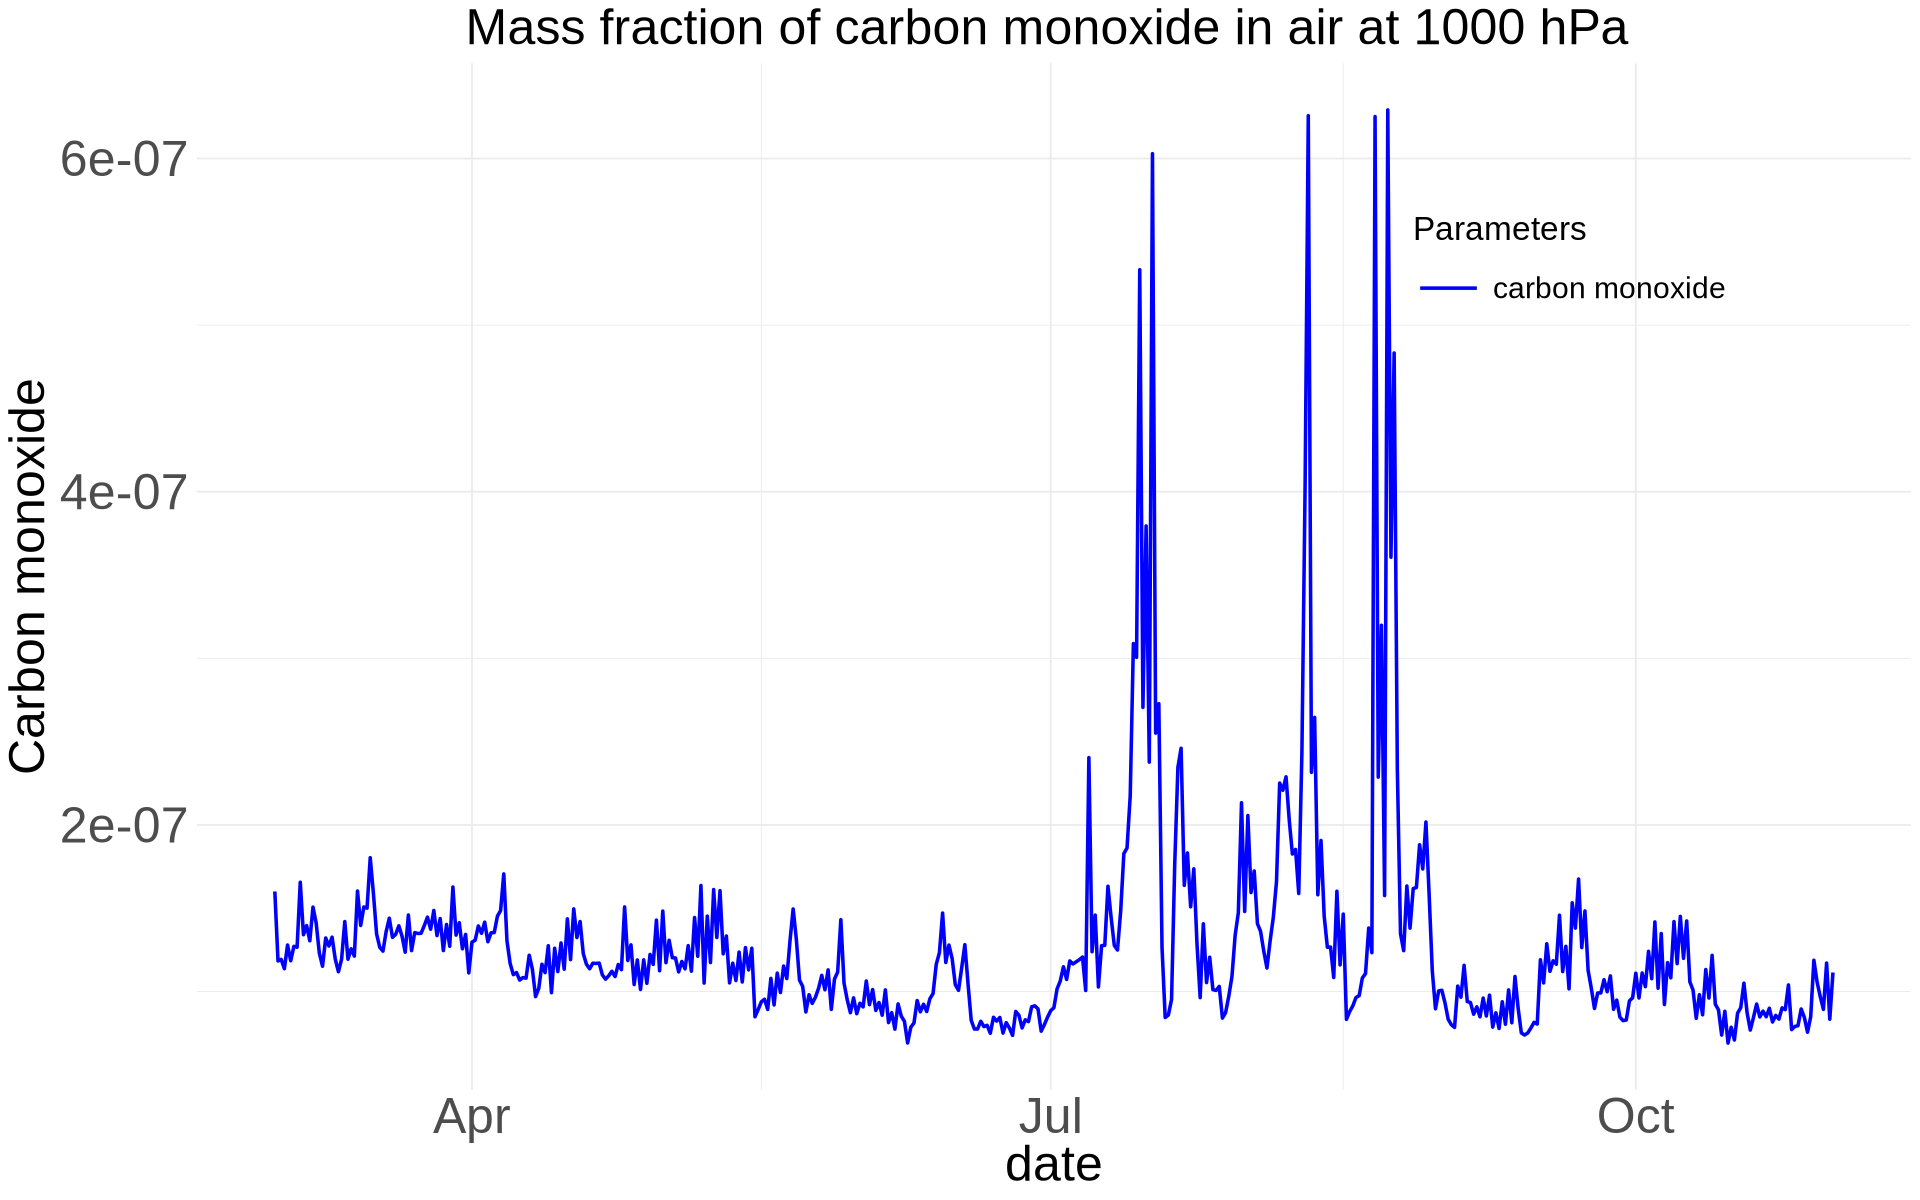

In [37]:
# Plot the graph with ggplot2
ggplot(df, aes(x = date)) +
    geom_line(aes(y = co, color = "carbon monoxide"), size = 1) +
    scale_y_continuous(
        name = "Carbon monoxide", 
         # Divide by 1.2 to find the original scale
      ) +

  ggtitle("Mass fraction of carbon monoxide in air at 1000 hPa ") +
  xlab("date") +
  ylab("Cabon monoxide") +
  scale_color_manual(
    name = "Parameters", 
    values = c("blue"))+
  theme_minimal() +

  theme(
    legend.position = c(0.8, 0.8),
    legend.title = element_text(size = 20),   # Increase tge size of legend title
    legend.text = element_text(size = 18),    # Increase tge size of text in the legend
    legend.key.size = unit(1.5, "cm"),  
    axis.text.x = element_text(size = 30),  # Increase the size of the x-axis values
    axis.text.y = element_text(size = 30),  # Increase the size of the y-axis values
    plot.title = element_text(hjust = 0.5, size = 30),  # Center and increase the size of the title
    axis.title.x = element_text(size = 30),  # Increase the size of the x-axis title
    axis.title.y = element_text(size = 30)    # Increase the size of the y-axis title
      )


We observe three major peaks corresponding to three fires that occurred near the city in July, late August, and early September 2022. It is clear that the concentration of carbon monoxide during these periods is significantly higher than at other times of the year.

## 6. Conclusion
[Go back to the "Table of contents"](#Table-of-contents)

<div class="alert alert-block alert-success">
<b>Congratulations!</b> You have successfully completed the introductory-intermediate tutorial on using Copernicus products to evaluate the drought in Europe in 2022. Throughout this tutorial, we have explained the basic tools necessary to access and visualize wekeo data, generate different types of plots.
<br><br>

In this tutorial, you acquired all the information you need to:
 


* Access NetCDF datasets.

* Navigate through the different variables, dimensions, and attributes of a NetCDF file.

* Plot maps of any variable.

* Modify maps to include additional information.

* Calculate the spatial and temporal mean.
 
We sincerely hope that you have enjoyed the tutorial and found useful information in it. Please keep in mind that the tutorial has a progressive difficulty, moving quickly from basic elements to intermediate levels. Our intention is for all users to find useful information tailored to their level.
 
We understand that, for a user without prior knowledge, fully understanding all the procedures in the tutorial may be a challenge that requires some effort. However, we encourage everyone to take on the challenge as this is just the beginning of a journey towards a new understanding of the ocean and its ecosystems.
 
</div>

 